<img src='img/fastcamp_h.png' height=100% width=100%>

# 10강. Dimensionality reduction (Autoencoder)

# 이번장에서 배우는 것들
* autoncoder
* convolutional autoencoder
* variational autoencoder

# 선형 연산의 단점

* pca는 강력한 차원 축소 알고리즘이지만 일반적인 경우 선형으로 동작함
* 이세상의 많은 데이터는 선형으로 풀리지 않는 문제가 많음
* 주어진 모든 사진을 선형 연산으로 좋은 화질로 압축 할 수 없음
* 다음 영상은 주어진 사람의 얼굴을 30개의 pc로 차원 축소한 사진의 예시임

<img src='img/10_01.png' height=100% width=100%>

# Autoencoder

* 딥러닝은 비선형 연산을 활성함수를 통하여 표현 가능
* 다음과 같은 구조가 있다면 어떨까?
* 딥러닝의 특징을 이용하여 사람의 개입이 없이 학습
* 파란 부분을 encoder라고 칭함
* 붉은 부분을 decoder라고 칭함

<img src='img/10_02.png' height=30% width=30%>

# Autoencoder의 구조

* 입력 tensor를 입력 보다 더 작은 차원으로 충분히 줄인 뒤 출력 차원을 입력 차원과 동일하게 맞춰주는 구조
* 입력 $x$와 출력 $\hat{x}$의 차이를 loss로 잡음 (mse or crossentropy)
* 중간 $z$부분에서 우리가 원하는 만큼의 차원으로 축소를 하는 구조


<img src='img/10_03.png' height=70% width=70%>

# Keras를 이용한 선형 autoencoder 구축

* mnist를 784 차원으로 축소한 뒤 이전 강좌의 pca처럼 선형 87차원으로 압축을 하여보자
* 해당 모델은 다음과 같은 구조로 구성됨

<img src='img/10_04.png' height=70% width=70%>

In [2]:
#pca 구하기
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)) /255.
x_test = x_test.reshape((-1, 28 * 28)) /255.

In [5]:
model = Sequential()
model.add(Dense(84, input_shape=(784,), activation='linear'))
model.add(Dense(784, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               66640     
Total params: 132,580
Trainable params: 132,580
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

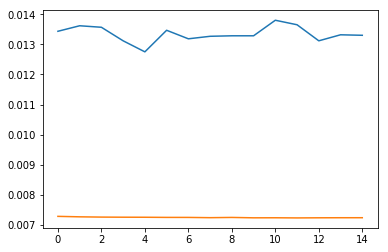

In [10]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

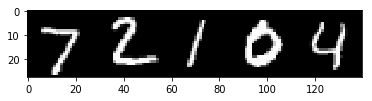

In [21]:
plt.imshow(np.hstack(x_test[:5].reshape((5, 28, 28))), cmap='gray')
plt.show()

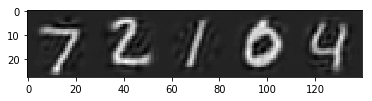

In [22]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# Keras를 이용한 비선형 shallow autoencoder 구축

* mnist를 784 차원으로 축소한 뒤 이전 강좌의 pca처럼 선형 87차원으로 압축을 하여보자
* 해당 모델은 다음과 같은 구조로 구성됨

<img src='img/10_04.png' height=70% width=70%>

In [24]:
model = Sequential()
model.add(Dense(84, input_shape=(784,), activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               66640     
Total params: 132,580
Trainable params: 132,580
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

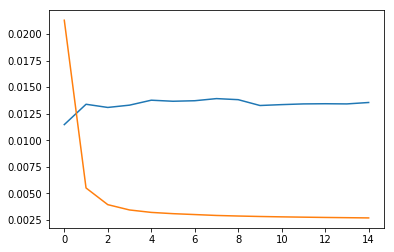

In [26]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

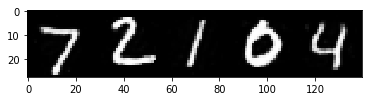

In [27]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# Keras를 이용한 비선형 2차원 shallow autoencoder 구축

* 해당 모델은 비선형이기 때문에 2차원으로 줄여도 압출이 더 잘될까?
* 2차원으로 줄이면 mnist 숫자 분포를 인간 눈에 시각화 할 수 있음
* 2차원까지 줄여보자
* 모델은 다음과 같음

<img src='img/10_05.png' height=70% width=70%>

In [29]:
model = Sequential()
model.add(Dense(2, input_shape=(784,), activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


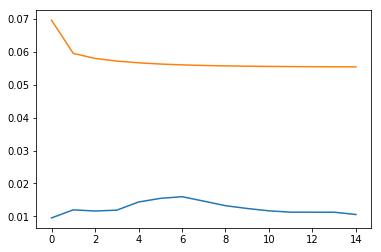

In [30]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

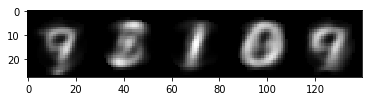

In [31]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# Keras를 이용한 비선형 2차원 deep autoencoder 구축

* sallow한 모델에서는 pca보다는 약간 나은것 같지만 2차원 z가 효율이 좋아보이지 않음을 확인
* hidden layer를 훨씬 더 깊게 두어 학습을 진행해보자
* 모델은 다음과 같음

<img src='img/10_06.png' height=70% width=70%>

In [72]:
from keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_56 (Batc (None, 64)                256       
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_57 (Batc (None, 32)                128       
_________________________________________________________________
dense_86 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_58 (Batc (None, 16)                64        
_________________________________________________________________
dense_87 (Dense)             (None, 8)                 136       
__________

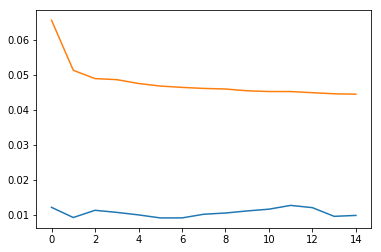

In [46]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

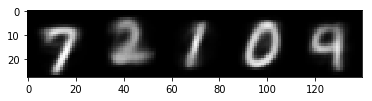

In [47]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# z (latent vector) 활용하기

### encoder
* 현재의 autoencoder는 입력 $x$을 넣으면 출력 $\hat{x}$가 나오지만 $z$ 출력을 이용 할 수는 없음
* 중간 z출력을 받는 모델을 encoder라고 칭함

### decoder
* 중간 z를 입력을 받아 $\hat{x}$를 출력하는 모델을 decoder라고 칭함

In [143]:
from keras.layers import Dense, BatchNormalization, Input

encoder_input = Input(shape=(784,))
layer1 = Dense(64, activation='relu')(encoder_input)
layer2 = BatchNormalization()(layer1)
layer3 = Dense(32, activation='relu')(layer2)
layer4 = BatchNormalization()(layer3)
layer5 = Dense(16, activation='relu')(layer4)
layer6 = BatchNormalization()(layer5)
layer7 = Dense(8, activation='relu')(layer6)
layer8 = BatchNormalization()(layer7)
layer9 = Dense(4, activation='relu')(layer8)
layer10 = BatchNormalization()(layer9)
layer11= Dense(2, activation='relu')(layer10)
layer_z = BatchNormalization()(layer11)
encoder = Model(inputs=encoder_input, outputs=layer_z)

decoder_input = Input(shape=(2,))
layer12 = Dense(4, activation='relu')(decoder_input)
layer13 = BatchNormalization()(layer12)
layer14 = Dense(8, activation='relu')(layer13)
layer15 = BatchNormalization()(layer14)
layer16 = Dense(16, activation='relu')(layer15)
layer17 = BatchNormalization()(layer16)
layer18= Dense(32, activation='relu')(layer17)
layer19 = BatchNormalization()(layer18)
layer20 = Dense(64, activation='relu')(layer19)
layer21 = BatchNormalization()(layer20)
layer22 = Dense(784, activation='sigmoid')(layer21)
decoder = Model(inputs=decoder_input, outputs=layer22)

ae_output = decoder(encoder(encoder_input))
ae = Model(encoder_input, ae_output)
ae.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [144]:
hist = ae.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)
ae.save_weights('./weights/ae.h5')

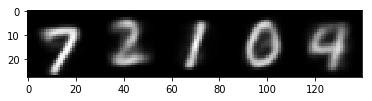

In [150]:
#autoencoder를 통하여 나온 2차원 데이터를 복원한 결과
#다소 흐릿하지만 이전보다 훨씬 높은 해상도로 어떤 숫자인지 알아볼 수 있음
plt.imshow(np.hstack(ae.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

In [151]:
#mnist 데이터에 encoder를 통과 시키면 2차원 배열로 차원 축소됨
encoded = encoder.predict(x_test.reshape((-1, 28*28)))
print(encoded.shape)

(10000, 2)


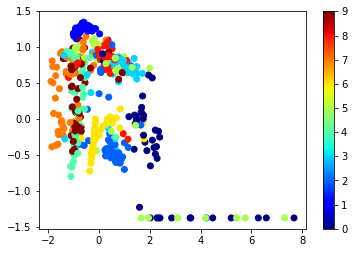

In [146]:
# 해당 2차원 배열을 시각화 하면 훨씬 더 높은 수준으로 시각화 할 수 있음
# 비슷한 데이터가 모여있음을 볼 수 있음
plt.scatter(x=encoded[:500,0], y=encoded[:500,1] , c=y_test[:500], cmap='jet')
plt.colorbar()
plt.show()

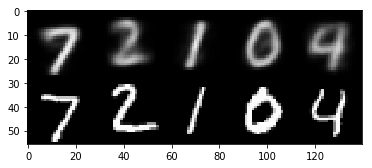

In [152]:
img1 = np.hstack(decoder.predict(encoded)[:5].reshape((5, 28, 28)))
img2 = np.hstack(x_test[:5].reshape((5, 28, 28)))
plt.imshow(np.vstack([img1, img2]) , cmap='gray')
plt.show()

# Convolutional Autoencoder의 구조

* 과거 mnist를 통하여 일반 fully connected network과 CNN의 차이를 배웠었음
* autoencoder에서도 같은 구조를 적용 할 수 있음


<img src='img/10_07.png' height=100% width=100%>

# Conv2D와 ConvTranspose2D

* Conv동작은 주어진 2차원 배열에서 kernel size와 stride, output channel에 맞게 연산을 하는 동작임
* 사전에 배운 것과 같이 padding을 하지 않으면 output height와 width가 점점 줄어들게 됨
* ConvTranspose 동작은 deconv라고도 쓰이며 (권장되지 않음) conv 동작을 역으로 하여 주어진 width와 height를 팽창 시키는 역할을 함


### Conv (파란 부분 입력, 초록부분 conv 동작후 output)
<img src='img/10_01.gif' height=30% width=30%>

### Conv Transpose (파란 부분 입력, 초록부분 conv transpose 동작후 output)
<img src='img/10_02.gif' height=30% width=30%>

In [3]:
from keras.layers import Dense, BatchNormalization, Input, Conv2D, Conv2DTranspose, Flatten, Reshape

cencoder_input = Input(shape=(28,28,1))
layer1 = Conv2D(32, (2,2), strides=2, activation='relu')(cencoder_input)
layer2 = BatchNormalization()(layer1)
layer3 = Conv2D(64, (2,2), strides=2, activation='relu')(layer2)
layer4 = BatchNormalization()(layer3)
layer5 = Conv2D(128, (2,2), strides=2, activation='relu')(layer4)
layer6 = BatchNormalization()(layer5)
layer7 = Flatten()(layer6)
layer_z = Dense(2, activation='relu')(layer7)
cencoder = Model(inputs=cencoder_input, outputs=layer_z)

cdecoder_input = Input(shape=(2,))
layer8 = Dense(1152, activation='relu')(cdecoder_input)
layer9 = BatchNormalization()(layer8)
layer10 = Reshape([3,3, 128])(layer9)
layer12 = Conv2DTranspose(64, (2,2), strides=2, output_padding=(1,1),activation='relu')(layer10)
layer13 = BatchNormalization()(layer12)
layer14= Conv2DTranspose(32, (2,2), strides=2, activation='relu')(layer13)
layer15 = BatchNormalization()(layer14)
layer16 = Conv2DTranspose(1, (2,2), strides=2, activation='sigmoid')(layer15)
cdecoder = Model(inputs=cdecoder_input, outputs=layer16)

cae_output = cdecoder(cencoder(cencoder_input))
cae = Model(cencoder_input, cae_output)
cae.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cae.load_weights('./weights/cae.h5')

In [4]:
cencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 3, 3, 128)         512       
__________

In [5]:
cdecoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1152)              3456      
_________________________________________________________________
batch_normalization_7 (Batch (None, 1152)              4608      
_________________________________________________________________
reshape_1 (Reshape)          (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 64)          32832     
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        8224      
__________

In [6]:
cae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
model_1 (Model)              (None, 2)                 44514     
_________________________________________________________________
model_2 (Model)              (None, 28, 28, 1)         49633     
Total params: 94,147
Trainable params: 91,203
Non-trainable params: 2,944
_________________________________________________________________


In [7]:
#pca 구하기
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))/255.
x_test = x_test.reshape((-1, 28, 28, 1))/255.

In [8]:
hist = cae.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

Instructions for updating:
Use tf.cast instead.


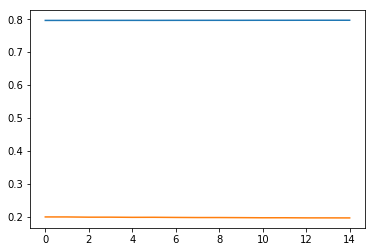

In [11]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

In [12]:
cae.save_weights('./weights/cae.h5')

In [13]:
#mnist 데이터에 encoder를 통과 시키면 2차원 배열로 차원 축소됨
encoded = cencoder.predict(x_test)
print(encoded.shape)

(10000, 2)


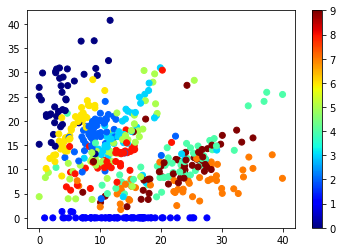

In [14]:
plt.scatter(x=encoded[:500,0], y=encoded[:500,1] , c=y_test[:500], cmap='jet')
plt.colorbar()
plt.show()

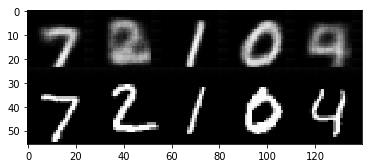

In [15]:
img1 = np.hstack(cdecoder.predict(encoded)[:5].reshape((5, 28, 28)))
img2 = np.hstack(x_test[:5].reshape((5, 28, 28)))
plt.imshow(np.vstack([img1, img2]) , cmap='gray')
plt.show()

# Feature Extraction

* 기존에는 행렬 연산을 통하여 각 dimension에서 중요한 정보를 가지고 있는 차원을 획득하는 방식의 연산을 씀
* 선형 연산의 한계를 가지고 있으며, 사람의 선택이 중요했음
* autoencoder 방식은 사람의 개입이 전혀 없어도 줄어드는 차원에 대하여 핵심적인 정보를 남김

* 첫번째 줄이 원본
* 두번째 줄이 autoencoder
* 세번째 줄이 pca
<img src='img/10_08.png' height=70% width=70%>

# Denosing Autoencoder

* autoencoder를 이용하여 효과적인 차원 축소 및 복원을 할 수 있음을 알게됨
* 더 나아가 autoencoder를 이용하여 원본이미지를 개선할 수 있지 않을까?
* Denosing autoencoder는 autoencoder의 속성을 이용하여 input에 포함된 noise를 제거함

<img src='img/10_10.png' height=50% width=50%>

# Denosing Autoencoder 구조

* DAE의 구조는 일반 AE와 완전하게 동일함
* 단지, loss를 계산하는 것이 일반 AE와 다름
* 일반 AE는 입력 $x$와 AE가 생성해낸 $ae(x) = \hat{x}$의 차이인 $(\hat{x}-x)^2$의 오차를 줄이는 것이 목표임
* DAE는 원본 $x$에 noise를 섞어서 $\tilde{x}$를 생성해냄
* $\tilde{x}$는 $x$ 대신 dae에 입력으로 들어감 $dae(\tilde{x}) = \hat{x}$
* 그러나 loss는  $(\tilde{x}-\hat{x})^2$가 아닌 $(x-\hat{x})^2$로 이루어짐
* 이 과정에서 network은 loss를 줄이기 위하여 noise를 제거하고 깨끗한 이미지로 복원할 수 밖에 없음

<img src='img/10_09.png' height=70% width=70%>

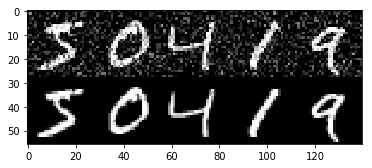

In [78]:
# 노이즈 추가
from skimage.util import random_noise

from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train/255.
x_test = x_test/255.

x_noise_train = random_noise(x_train, var=0.05)
x_noise_test = random_noise(x_test, var=0.05)

img = np.vstack([np.hstack(x_noise_train[:5]), np.hstack(x_train[:5])])
plt.imshow(img, cmap='gray')
plt.show()

In [79]:
from keras.layers import Dense, BatchNormalization, Input, Activation
from keras import backend as K

x_train = x_train.reshape((-1,28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_noise_train = x_noise_train.reshape((-1, 28, 28, 1))
x_noise_test = x_noise_test.reshape((-1, 28, 28, 1))


intputs = Input(shape=(28,28,1))
x = Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', padding='same')(intputs)
x = Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', padding='same')(x)

shape = K.int_shape(x)
x = Flatten()(x)
latent = Dense(10)(x)

x = Dense(shape[1] * shape[2] * shape[3])(latent)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(filters=1, kernel_size=3, padding='same')(x)
outputs = Activation('sigmoid', name='decoder_output')(x)
model = Model(intputs, outputs)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                31370     
_________________________________________________________________
dense_57 (Dense)             (None, 3136)              34496     
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 64)          0         
__________

In [80]:
hist = model.fit(x=x_noise_train, y=x_train, validation_data=(x_noise_test, x_test), batch_size=32, epochs=5, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 333us/step - loss: 0.0305 - acc: 0.8071 - val_loss: 0.0178 - val_acc: 0.8097
Epoch 2/5
60000/60000 [==============================] - 19s 310us/step - loss: 0.0170 - acc: 0.8107 - val_loss: 0.0158 - val_acc: 0.8104
Epoch 3/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.0156 - acc: 0.8114 - val_loss: 0.0148 - val_acc: 0.8106
Epoch 4/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.0149 - acc: 0.8117 - val_loss: 0.0147 - val_acc: 0.8112
Epoch 5/5
60000/60000 [==============================] - 19s 311us/step - loss: 0.0144 - acc: 0.8119 - val_loss: 0.0141 - val_acc: 0.8108


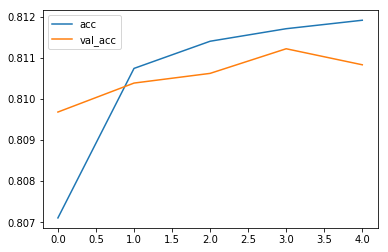

In [81]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'], label='acc')
plt.plot(hist.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

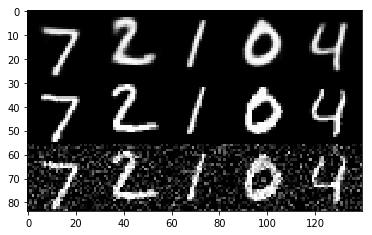

In [83]:
preds = model.predict(x_noise_test[:5])
img = np.vstack([
    np.hstack(preds.reshape((-1, 28, 28))),
    np.hstack(x_test[:5].reshape((-1, 28, 28))),
    np.hstack(x_noise_test[:5].reshape((-1, 28, 28)))])
plt.imshow(img, cmap='gray')
plt.show()

In [84]:
model.save_weights('./weights/dae.h5')

# 데이터의 생성

* 아무 정보도 모르는 상태에서 입력 X와 유사한 데이터를 생성 할 수 있을까?
* z에 아무 숫자나 넣어서 입력 x와 유사한 데이터들을 생성해보자

In [86]:
cdecoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1152)              3456      
_________________________________________________________________
batch_normalization_7 (Batch (None, 1152)              4608      
_________________________________________________________________
reshape_1 (Reshape)          (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 64)          32832     
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        8224      
__________

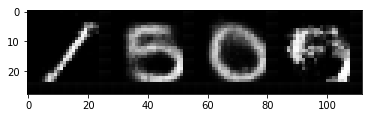

In [101]:
#임의의 z를 생성해봄
z1 = np.array([[0, 0]])
z2 = np.array([[23, 34]])
z3 = np.array([[12, 34]])
z4 = np.array([[54, 52]])
z1_img = cdecoder.predict(z1)
z2_img = cdecoder.predict(z2)
z3_img = cdecoder.predict(z3)
z4_img = cdecoder.predict(z4)
plt.imshow(np.hstack([
    z1_img.reshape((28, 28)),
    z2_img.reshape((28, 28)),
    z3_img.reshape((28, 28)),
    z4_img.reshape((28, 28)),
]), cmap='gray')
plt.show()

# Variational Autoencoder

* 이후 많은 구조들이 AE 구조에 영감을 받음
* 많은 task들이 AE 구조와 유사하게 문제를 해결함
 * 번역, colorize, segmentation 등
* 어떤 연구자들은 AE의 latent vector $z$를 이용하여 데이터 자체를 생성하는 것에 관심을 가짐
* VAE는 latent vector $z$를 이용하여 $P(x|z)$ 분포에 있는 $x$를 근사하는 $\hat{x}$를 생성해 낼 수 있음


<img src='img/10_11.png' height=70% width=70%>

# Variational Autoencoder

* 이후 많은 구조들이 AE 구조에 영감을 받음
* 많은 task들이 AE 구조와 유사하게 문제를 해결함
 * 번역, colorize, segmentation 등
* 어떤 연구자들은 AE의 latent vector $z$를 이용하여 데이터 자체를 생성하는 것에 관심을 가짐
* VAE는 최종적으로 x를 P(x|z)로 표현 하고 싶어함, 하지만 우리에겐 모든 z도 모든 x도 없기 때문에 P(x|z)를 직접 구할 수 없음
* 그렇기 때문에 variational inference라는 방식으로 직접 구하기 어려운 P분포를 구하기 위하여 상대적으로 데이터에서 근사할 수 있는 Q분포를 이용하여 P(x|z)를 근사함

<img src='img/10_11.png' height=70% width=70%>

# Variational Autoencoder의 구조

* VAE는 크게 3단계로 이루어져있음
* encoder
 * encoder는 x가 주어졌을때 z를 근사하는 q(z|x)로 이루어짐
 * z는 multi variable 가우시안 분포라고 가정함 (평균과 표준편차가 여러개로 구성)
* sampling
 * encoder가 출력한 평균과 표준편차를 이용하여, 해당 분포에 존재할 것 같은 z를 추출해냄
* decoder
 * z가 출력되면 x는 이미 주어져있기 때문에 p(x|z)로 $\hat{x}$를 재생성함

* loss
 * z를 더 잘표현하는 평균과 편차를 찾는 loss (q(z|x) = q(z|x)를 kld를 이용하여 구성)
 * 입력 x와 출력 $\hat{x}$의 차이를 줄이는 loss로 구성

<img src='img/10_11.png' height=70% width=70%>

# Reparameterization Trick

* sample 과정상 z는 이미 encoder에서 분포를 구축하는데 필요한 평균과 분산을 전달 받음
* 해당 인자들을 이용히여 z를 샘플링하여 decoder로 넘기는 것은 문제가 아님
* 하지만 loss를 계산하여 backprop이 일어날 때 전달받은 평균과 분산으로 랜덤하게 구축된 z를 미분 할 수 없음
* 미분 할 수 없으면 오차를 줄여나갈 수 없기 때문에 reparameterization trick이 등장

<img src='img/10_12.png' height=70% width=70%>
<img src='img/10_13.png' height=70% width=70%>

In [118]:
from keras.layers import Lambda
from keras.losses import binary_crossentropy

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def vae_loss(y_true, y_pred):
    reconstruction_loss = binary_crossentropy(y_true, y_pred) * 28 * 28
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return K.mean(reconstruction_loss + kl_loss)
    
    
inputs = Input(shape=(28 * 28,))
x = Dense(512, activation='relu')(inputs)
z_mean = Dense(2)(x)
z_log_var = Dense(2)(x)

z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z])
encoder.summary()

latent_inputs = Input(shape=(2,))
x = Dense(512, activation='relu')(latent_inputs)
outputs = Dense(28 * 28, activation='sigmoid')(x)

decoder = Model(latent_inputs, outputs)
decoder.summary()

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs)
vae.compile(loss=vae_loss, optimizer='adam')
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_91 (Dense)                (None, 512)          401920      input_24[0][0]                   
__________________________________________________________________________________________________
dense_92 (Dense)                (None, 2)            1026        dense_91[0][0]                   
__________________________________________________________________________________________________
dense_93 (Dense)                (None, 2)            1026        dense_91[0][0]                   
__________________________________________________________________________________________________
lambda_8 (

In [119]:
X = x_train.reshape((-1, 28*28))
Y = X
Xt = x_test.reshape((-1, 28*28))
Yt = Xt
vae.fit(X, Y, epochs=50, batch_size=128, validation_data=(Xt, Yt))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 81us/step - loss: 195.7707 - val_loss: 171.0727
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 167.9518 - val_loss: 165.6355
Epoch 3/50
60000/60000 [==============================] - 3s 55us/step - loss: 164.3721 - val_loss: 163.5389
Epoch 4/50
60000/60000 [==============================] - 3s 55us/step - loss: 162.3740 - val_loss: 161.8154
Epoch 5/50
60000/60000 [==============================] - 3s 55us/step - loss: 160.8081 - val_loss: 160.4740
Epoch 6/50
60000/60000 [==============================] - 3s 55us/step - loss: 159.4504 - val_loss: 159.4063
Epoch 7/50
60000/60000 [==============================] - 3s 55us/step - loss: 158.2713 - val_loss: 158.2317
Epoch 8/50
60000/60000 [==============================] - 3s 55us/step - loss: 157.1836 - val_loss: 157.3706
Epoch 9/50
60000/60000 [==============================] - 3s 55us/step - loss:

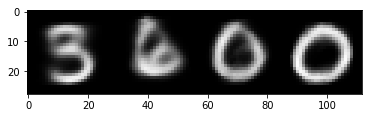

In [120]:
#임의의 z를 생성해봄
z1 = np.array([[0, 0]])
z2 = np.array([[1, 1]])
z3 = np.array([[0, 2]])
z4 = np.array([[0, 3]])
z1_img = decoder.predict(z1)
z2_img = decoder.predict(z2)
z3_img = decoder.predict(z3)
z4_img = decoder.predict(z4)
plt.imshow(np.hstack([
    z1_img.reshape((28, 28)),
    z2_img.reshape((28, 28)),
    z3_img.reshape((28, 28)),
    z4_img.reshape((28, 28)),
]), cmap='gray')
plt.show()

In [121]:
vae.save_weights('./weights/vae.h5')

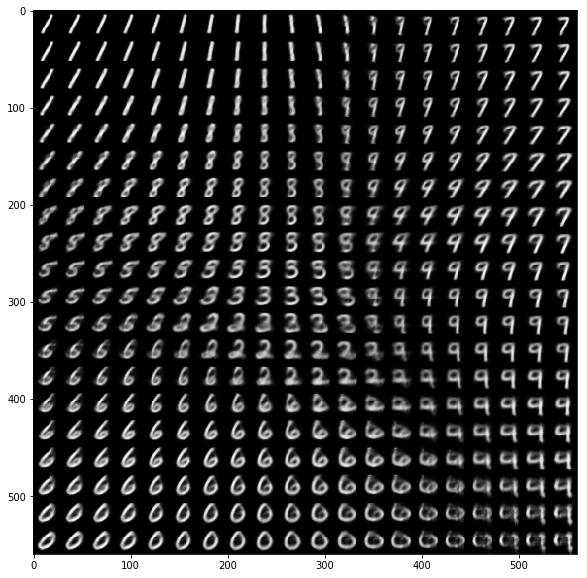

In [129]:
xs1 = np.linspace(-2, 2, 20)
xs2 = np.linspace(-2, 2, 20)

res = []
for x2 in xs2:
    imgs = []
    for x1 in xs1:
        img = decoder.predict(np.array([[x1, x2]])).reshape((28, 28))
        imgs.append(img)
    imgs = np.hstack(imgs)
    res.append(imgs)
res = np.vstack(res)

plt.figure(figsize=(20,10))
plt.imshow(res, cmap='gray')
plt.show()